## Student: Villanueva Chirito, Mariano Alonso
**Date:** Viernes 23 de Mayo del 2024-1

The following notebook compares the performance of investment strategies, one based on the Support Vector Classifer model and another on Multilayer Neural Networks, against the historical performance of SP500 (GSPC), that is, maintaining the investment.

En el siguiente notebook se compara el desempeño de  estrategias de inversión una basada en el modelo Support Vector Classifer y otra en Redes Neuronales Multicapa, contra el rendimiento histórico de SP500 (GSPC), es decir manteniendo la inversión.

# Libraries

In [2]:
# standard
import math
import numpy as np
import pandas as pd
# models
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
# getting data
import yfinance as yf
# plot
import seaborn
import matplotlib.pyplot as plt
from matplotlib import style

# Importing data



The S&P 500 is an index of American stock, which includes 500 of America's largest public companies. It ranks among indicators well-tracked in the U.S. stock market and gauges the relation with the general economy.

- **Composition:** It comprises firms in the technology, healthcare, energy, finance, and consumer goods sectors.
- **Selection Criteria:** The companies are selected based on market capitalization, liquidity, and industry sector.
- **Diversification:** Diversification is broad because it encompasses companies of very many sizes and from a variety of sectors.

The S&P 500 is the primary benchmark that the most significant portion of investors and analysts follows in trying to assess how the United States stock markets are performing. The performance of the S&P 500 is watched by every investor so that they can attain the overall picture trends and economy progression of the markets.




In [3]:
df = yf.download('^GSPC', start='2019-01-01', end='2024-01-01')


[*********************100%%**********************]  1 of 1 completed


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-01-02 to 2023-12-29
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1258 non-null   float64
 1   High       1258 non-null   float64
 2   Low        1258 non-null   float64
 3   Close      1258 non-null   float64
 4   Adj Close  1258 non-null   float64
 5   Volume     1258 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.8 KB


In [5]:
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000


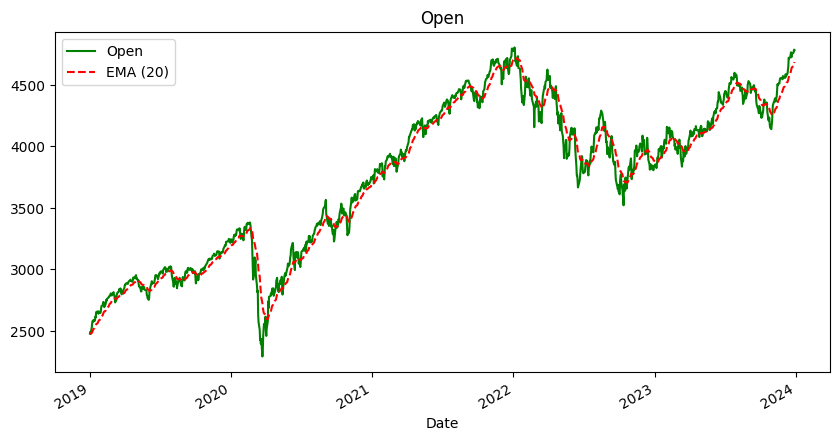

In [6]:
# Plot the opening prices
df['Open'].plot(kind='line', color='green', figsize=(10, 5), title='Open')

# Calculate the Exponential Moving Average (EMA)
ema = df['Open'].ewm(span=20, adjust=False).mean()

# Plot the EMA
plt.plot(df.index, ema, color='red', linestyle='--', label='EMA (20)')

# Show the legend and the plot
plt.legend()
plt.show()



# Preprocessing

In [7]:
#Making index the column 'Date'
df['Date'] = df.index
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1258 entries, 2019-01-02 to 2023-12-29
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Open       1258 non-null   float64       
 1   High       1258 non-null   float64       
 2   Low        1258 non-null   float64       
 3   Close      1258 non-null   float64       
 4   Adj Close  1258 non-null   float64       
 5   Volume     1258 non-null   int64         
 6   Date       1258 non-null   datetime64[ns]
dtypes: datetime64[ns](1), float64(5), int64(1)
memory usage: 78.6 KB


In [8]:
correlation_matrix = df.corr()
print(correlation_matrix)


               Open      High       Low     Close  Adj Close    Volume  \
Open       1.000000  0.999405  0.999129  0.998413   0.998413 -0.042512   
High       0.999405  1.000000  0.998844  0.999151   0.999151 -0.032263   
Low        0.999129  0.998844  1.000000  0.999252   0.999252 -0.060434   
Close      0.998413  0.999151  0.999252  1.000000   1.000000 -0.047497   
Adj Close  0.998413  0.999151  0.999252  1.000000   1.000000 -0.047497   
Volume    -0.042512 -0.032263 -0.060434 -0.047497  -0.047497  1.000000   
Date       0.829428  0.833330  0.825830  0.829487   0.829487  0.032415   

               Date  
Open       0.829428  
High       0.833330  
Low        0.825830  
Close      0.829487  
Adj Close  0.829487  
Volume     0.032415  
Date       1.000000  


## New variables

In [9]:
#Diference between opening and closing price / highest - lower price
df['Open-Close'] = df.Open - df.Close
df['Volatility'] = df.High - df.Low
df.sample(3)

,Open,High,Low,Close,Adj Close,Volume,Date,Open-Close,Volatility
Date,,,,,,,,,
2023-10-19,4321.359863,4339.540039,4269.689941,4278.000000,4278.000000,3969730000,2023-10-19,43.359863,69.850098
2020-07-16,3208.360107,3220.389893,3198.590088,3215.570068,3215.570068,3972860000,2020-07-16,-7.209961,21.799805
2023-08-07,4491.580078,4519.839844,4491.149902,4518.439941,4518.439941,3493920000,2023-08-07,-26.859863,28.689941


In [10]:
!pip install ta


  Preparing metadata (setup.py) ... done
  Created wheel for ta: filename=ta-0.11.0-py3-none-any.whl size=29411 sha256=2ca75bfecf6ec06c7b84a574e6c59f7c3e9ed17485756840eb6f8ffdc2ff828e
  Stored in directory: /root/.cache/pip/wheels/5f/67/4f/8a9f252836e053e532c6587a3230bc72a4deb16b03a829610b
Successfully built ta


In [11]:
import ta

# Ejemplo de RSI (Relative Strength Index)
df['RSI'] = ta.momentum.RSIIndicator(df['Close']).rsi()

# Ejemplo de MACD (Moving Average Convergence Divergence)
macd = ta.trend.MACD(df['Close'])
df['MACD'] = macd.macd()
df['MACD_signal'] = macd.macd_signal()
df['MACD_diff'] = macd.macd_diff()



In [12]:
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,Date,Open-Close,Volatility,RSI,MACD,MACD_signal,MACD_diff
Date,,,,,,,,,,,,,
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000,2023-12-22,-0.709961,36.169922,71.069402,77.173143,73.625472,3.547671
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000,2023-12-26,-15.890137,26.270020,72.704374,77.822249,74.464827,3.357421
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000,2023-12-27,-8.129883,16.490234,73.256889,77.988793,75.169621,2.819173
2023-12-28,4786.439941,4793.299805,4780.979980,4783.350098,4783.350098,2698860000,2023-12-28,3.089844,12.319824,73.407118,77.371714,75.610039,1.761675
2023-12-29,4782.879883,4788.430176,4751.990234,4769.830078,4769.830078,3126060000,2023-12-29,13.049805,36.439941,70.164874,74.927998,75.473631,-0.545633


In [13]:
df['Return'] =  df.Close.pct_change()
df

,Open,High,Low,Close,Adj Close,Volume,Date,Open-Close,Volatility,RSI,MACD,MACD_signal,MACD_diff,Return
Date,,,,,,,,,,,,,,
2019-01-02,2476.959961,2519.489990,2467.469971,2510.030029,2510.030029,3733160000,2019-01-02,-33.070068,52.020020,NaN,NaN,NaN,NaN,NaN
2019-01-03,2491.919922,2493.139893,2443.959961,2447.889893,2447.889893,3858830000,2019-01-03,44.030029,49.179932,NaN,NaN,NaN,NaN,-0.024757
2019-01-04,2474.330078,2538.070068,2474.330078,2531.939941,2531.939941,4234140000,2019-01-04,-57.609863,63.739990,NaN,NaN,NaN,NaN,0.034336
2019-01-07,2535.610107,2566.159912,2524.560059,2549.689941,2549.689941,4133120000,2019-01-07,-14.079834,41.599854,NaN,NaN,NaN,NaN,0.007010
2019-01-08,2568.110107,2579.820068,2547.560059,2574.409912,2574.409912,4120060000,2019-01-08,-6.299805,32.260010,NaN,NaN,NaN,NaN,0.009695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-22,4753.919922,4772.939941,4736.770020,4754.629883,4754.629883,3046770000,2023-12-22,-0.709961,36.169922,71.069402,77.173143,73.625472,3.547671,0.001660
2023-12-26,4758.859863,4784.720215,4758.450195,4774.750000,4774.750000,2513910000,2023-12-26,-15.890137,26.270020,72.704374,77.822249,74.464827,3.357421,0.004232
2023-12-27,4773.450195,4785.390137,4768.899902,4781.580078,4781.580078,2748450000,2023-12-27,-8.129883,16.490234,73.256889,77.988793,75.169621,2.819173,0.001430


In [14]:
df.dropna(inplace=True)

## Predictors Variables (X)

In [15]:
# Store all predictor variables in a variable X
X = df[['Open-Close', 'Volatility', 'RSI','MACD','MACD_signal','MACD_diff']]

In [16]:
X.head()

,Open-Close,Volatility,RSI,MACD,MACD_signal,MACD_diff
Date,,,,,,
2019-02-20,-5.649902,15.819824,75.713613,46.551145,44.721936,1.829209
2019-02-21,5.360107,17.030029,71.817111,45.801742,44.937897,0.863844
2019-02-22,-12.000000,15.089844,74.388582,46.111793,45.172677,0.939117
2019-02-25,8.239990,18.500000,74.866160,46.103652,45.358872,0.744780
2019-02-26,-1.539795,13.650146,73.912564,45.395562,45.366210,0.029353


## Predicted Variable (y)

In [17]:
# Target variables
y = np.where(df['Close'].shift(-1) > df['Close'], 1, 0)
y

array([0, 1, 1, ..., 1, 0, 0])

# Models

In [18]:
# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)




## SVM

In [19]:
# Support vector classifier
Modelo_SVC1 = SVC()

In [20]:
%%time
Modelo_SVC1.fit(X_train, y_train)

CPU times: user 49.2 ms, sys: 0 ns, total: 49.2 ms
Wall time: 50.3 ms


SVC()

In [21]:
#Prediction
df["y_real_total"] = y
df['y_pred_svc'] = Modelo_SVC1.predict(X)
df.head(3)

,Open,High,Low,Close,Adj Close,Volume,Date,Open-Close,Volatility,RSI,MACD,MACD_signal,MACD_diff,Return,y_real_total,y_pred_svc
Date,,,,,,,,,,,,,,,,
2019-02-20,2779.050049,2789.879883,2774.060059,2784.699951,2784.699951,3904830000,2019-02-20,-5.649902,15.819824,75.713613,46.551145,44.721936,1.829209,0.001777,0,1
2019-02-21,2780.239990,2781.580078,2764.550049,2774.879883,2774.879883,3598260000,2019-02-21,5.360107,17.030029,71.817111,45.801742,44.937897,0.863844,-0.003526,1,1
2019-02-22,2780.669922,2794.199951,2779.110107,2792.669922,2792.669922,3429350000,2019-02-22,-12.000000,15.089844,74.388582,46.111793,45.172677,0.939117,0.006411,1,1


In [22]:
# valuees of y_pred_svc

df['y_pred_svc'].value_counts()

y_pred_svc
1    1080
0     145
Name: count, dtype: int64

## Multilayer Neural Networks

In [23]:
# Normalize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Define the model
mlp = MLPRegressor(hidden_layer_sizes=(100, 100), max_iter=500, random_state=42)

# Train the model
mlp.fit(X_train_scaled, y_train)

# Add the MLP predictions to the DataFrame
df['y_pred_MLP'] = mlp.predict(scaler.transform(X))



# Performance

## SVC

In [24]:
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.y_pred_svc.shift(1)
# Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()


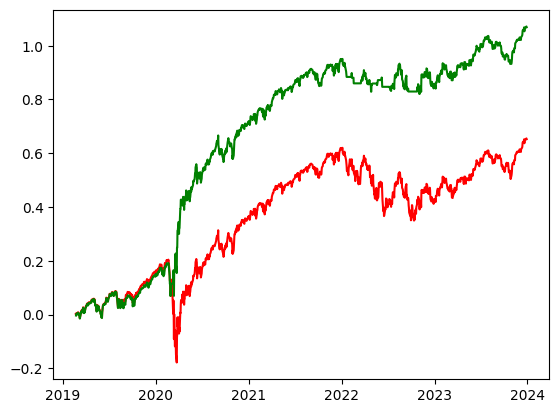

In [25]:
# Plotting

import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='green')

## MLP (RED MULTICAPA)

In [26]:
# Evaluate the model
mse = mean_squared_error(y, df['y_pred_MLP'])
r2 = r2_score(y, df['y_pred_MLP'])

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 0.18623695348370406
R^2 Score: 0.2509184790598322


MSE measures the average squared difference between the predicted values and the actual values. A lower MSE indicates a better fit of the model to the data.

In [27]:
# Calculate strategy returns
df['Strategy_Return'] = df.Return *df.y_pred_MLP.shift(1)
# Strategy Cumulative returns
df['Cum_Strategy'] = df['Strategy_Return'].cumsum()
# Calculate Cumulutive returns
df['Cum_Ret'] = df['Return'].cumsum()


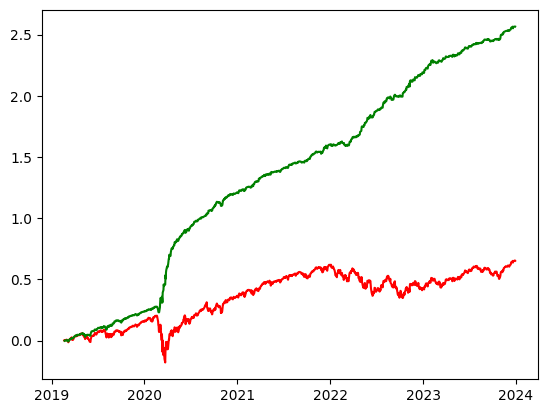

In [28]:
#Plotting results
plt.plot(df['Cum_Ret'],color='red')
plt.plot(df['Cum_Strategy'],color='green')

In a real-world scenario, transaction costs can significantly affect the performance of a trading strategy.   We haven't included these in our  model, the performance might be overly optimistic.